In [ ]:
# install dependencies
import sys
!{sys.executable} -m pip install sklearn_evaluation

In [77]:
# import dependencies
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

import warnings
from sklearn.model_selection import GridSearchCV
from sklearn_evaluation import plot

#### Exploratory Data Analysis

In [78]:
##### data loading and feature extraction

dataset_1_path = './datasets/project3_dataset1.txt'
dataset_1 = pd.read_csv(dataset_1_path,sep='\t',header=None)
num_columns = len(dataset_1.columns)
num_features = num_columns - 1
dataset_1.columns=["F"+str(i) for i in range(1, num_columns + 1)]
label_column = "F{0}".format(num_columns)
dataset_1_features = dataset_1.loc[:, dataset_1.columns != label_column]
dataset_1_label = dataset_1.loc[:, dataset_1.columns == label_column]



dataset_2_path = './datasets/project3_dataset2.txt'
# load the CSV file as a dataframe
dataset_2 = pd.read_csv(dataset_2_path,sep='\t',header=None)
num_columns = len(dataset_2.columns)
num_features = num_columns - 1
dataset_2.columns=["F"+str(i) for i in range(1, num_columns + 1)]
label_column = "F{0}".format(num_columns)
custom_encoding = {'Present':1, 'Absent':0}
dataset_2["F5"] = dataset_2["F5"].map(custom_encoding)
dataset_2_features = dataset_2.loc[:, dataset_2.columns != label_column]
dataset_2_label = dataset_2.loc[:, dataset_2.columns == label_column]


In [79]:
X, Y = dataset_1_features, dataset_1_label

In [80]:
X2, Y2 = dataset_2_features, dataset_2_label

#### Hyperparameter Tuning Models

In [186]:
def tune_svm(X,Y):
    svc = SVC()
    parameters = {'kernel':('linear', 'rbf', 'sigmoid'), 'C':[0.001,0.1,1, 10,100000]}
    clf = GridSearchCV(svc, parameters, scoring='accuracy')
    clf.fit(X,Y.values.ravel())
    #cv_results = cross_validate(clf, X,Y.values.ravel(), cv=10, scoring=('accuracy', 'precision', 'recall', 'f1','roc_auc'), return_train_score=True)
    return clf

In [82]:
def tune_adaboost(X,Y):
    ada = AdaBoostClassifier(random_state=0)
    parameters = {'n_estimators': [100,200,300]}
    clf = GridSearchCV(ada, parameters, scoring='accuracy')
    clf = clf.fit(X, Y.values.ravel())
    #cv_results = cross_validate(clf, X,Y.values.ravel(), cv=10, scoring=('accuracy', 'precision', 'recall', 'f1','roc_auc'), return_train_score=True)
    return clf

In [122]:
def tune_logistic_regression(X,y, max_iter=100):
    logisticRegr = LogisticRegression(max_iter=max_iter)    
    scaler = preprocessing.StandardScaler().fit(X)
    x_scaled = scaler.transform(X)
    parameters={"C":[10**-5,10**-3,0.1,5,10**5]}
    clf = GridSearchCV(logisticRegr, parameters, scoring='accuracy', cv = 10)
    clf = clf.fit(x_scaled,y.values.ravel())
    return clf
    #cv_results = cross_validate(logisticRegr, x_scaled,y.values.ravel(), cv=10, scoring=('accuracy', 'precision', 'recall', 'f1','roc_auc'), return_train_score=True)

In [84]:
# TODO: Can I use the sklearn implementation? Or should I use the decision tree classifier to create custom random forest methodß
def tune_random_forest(X,y):
    param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
        }
    rf = RandomForestClassifier()
    clf = GridSearchCV(rf, param_grid, scoring='accuracy', cv = 10)
    clf = clf.fit(X,y.values.ravel())
    return clf

In [85]:
def tune_knn(X,y):
    
    scaler = preprocessing.StandardScaler().fit(X)
    x_scaled = scaler.transform(X)
    #x_scaled_test = scaler.transform(x_test)
    k_range = list(range(1, 31))
    param_grid = dict(n_neighbors=k_range)
    knn = KNeighborsClassifier()
    clf = GridSearchCV(knn, param_grid, scoring='accuracy', cv = 10)
    clf = clf.fit(x_scaled,y.values.ravel())
    return clf

In [86]:
def tune_decision_tree(X,y):
    params = {'max_leaf_nodes': list(range(2, 31)), 'min_samples_split': [2, 3, 4]}
    dt = tree.DecisionTreeClassifier()
    clf = GridSearchCV(dt, params, scoring='accuracy', cv = 10)
    clf = clf.fit(X,y)
    return clf

#### Dataset 1 Hyperparameter Tuning

In [187]:
svm_d1_clf = tune_svm(X,Y)
svm_d1_clf.best_params_
svm_d1_clf.cv_results_

{'mean_fit_time': array([3.66487503e-03, 4.19917107e-03, 4.49934006e-03, 7.61989594e-02,
        2.53033638e-03, 4.29830551e-03, 4.47899818e-01, 1.89881325e-03,
        4.39910889e-03, 1.87299848e+00, 1.90081596e-03, 3.90005112e-03,
        4.50009942e+00, 4.15999413e-02, 3.89986038e-03]),
 'std_fit_time': array([4.94137505e-04, 5.10304693e-04, 1.06196677e-06, 3.18503293e-02,
        6.23532733e-05, 2.45165008e-04, 1.79624971e-01, 2.00178738e-04,
        2.00178681e-04, 9.32244395e-01, 2.00464099e-04, 2.00033216e-04,
        1.70229330e+00, 3.53997674e-02, 1.99705379e-04]),
 'mean_score_time': array([0.00090127, 0.0026001 , 0.0016006 , 0.00090151, 0.00166879,
        0.00140061, 0.00100088, 0.00140057, 0.00120058, 0.00090098,
        0.0009995 , 0.00130019, 0.00100031, 0.00110044, 0.00119991]),
 'std_score_time': array([1.99702988e-04, 2.00200159e-04, 1.99988290e-04, 1.99939953e-04,
        2.12453649e-04, 1.99629151e-04, 3.15303861e-04, 1.99484960e-04,
        2.44581748e-04, 2.006347

<AxesSubplot: title={'center': 'Grid search results'}, xlabel='C', ylabel='Mean score'>

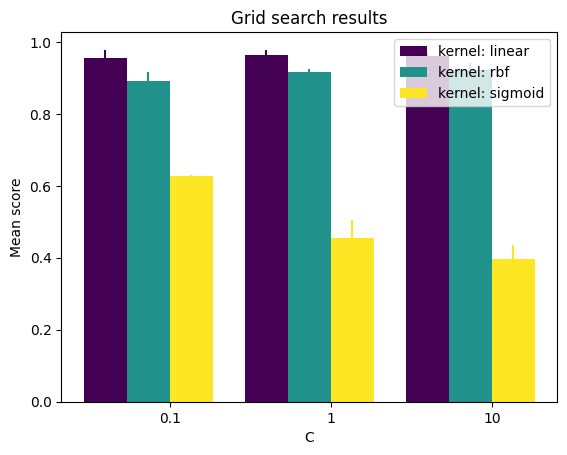

In [176]:
plot.grid_search(svm_d1_clf.cv_results_, change='C', kind='bar')

<AxesSubplot: title={'center': 'Grid search results'}, xlabel='kernel', ylabel='Mean score'>

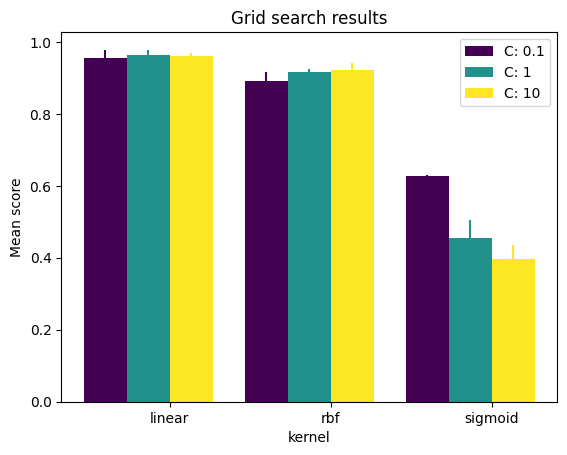

In [178]:
plot.grid_search(svm_d1_clf.cv_results_, change='kernel', kind='bar')

<AxesSubplot: >

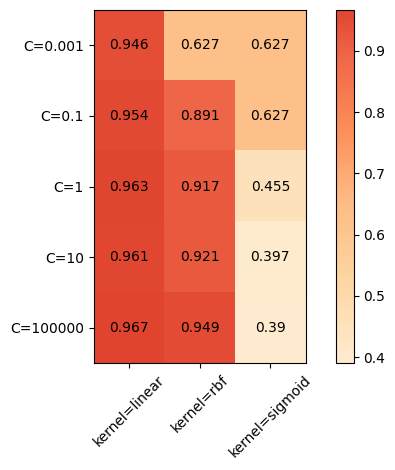

In [188]:
plot.grid_search(svm_d1_clf.cv_results_, change=('C', 'kernel'))

In [95]:
adaboost_d1_clf = tune_adaboost(X,Y)
adaboost_d1_clf.best_params_

{'n_estimators': 300}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:title={'center':'Grid search results'}, xlabel='n_estimators', ylabel='Mean score'>

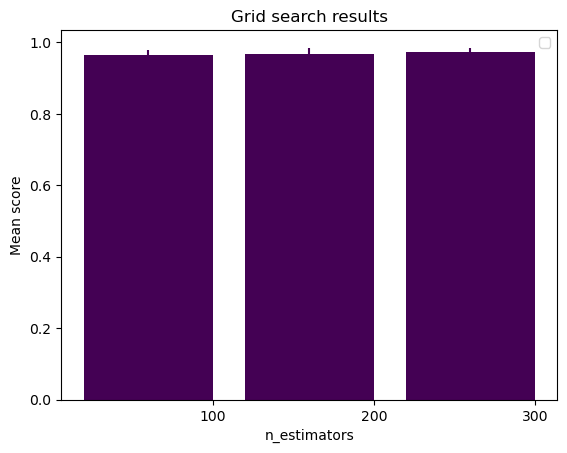

In [96]:
plot.grid_search(adaboost_d1_clf.cv_results_, change='n_estimators', kind='bar')

In [97]:
adaboost_d1_clf.cv_results_

{'mean_fit_time': array([0.15803232, 0.31335802, 0.46979699]),
 'std_fit_time': array([0.004167  , 0.003859  , 0.00325899]),
 'mean_score_time': array([0.00750241, 0.01410913, 0.02071962]),
 'std_score_time': array([0.00022843, 0.00013508, 0.00059125]),
 'param_n_estimators': masked_array(data=[100, 200, 300],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 100},
  {'n_estimators': 200},
  {'n_estimators': 300}],
 'split0_test_score': array([0.97368421, 0.97368421, 0.97368421]),
 'split1_test_score': array([0.95614035, 0.95614035, 0.97368421]),
 'split2_test_score': array([0.97368421, 0.98245614, 0.98245614]),
 'split3_test_score': array([0.97368421, 0.98245614, 0.98245614]),
 'split4_test_score': array([0.9380531 , 0.9380531 , 0.94690265]),
 'mean_test_score': array([0.96304922, 0.96655799, 0.97183667]),
 'std_test_score': array([0.01422566, 0.01718919, 0.01306965]),
 'rank_test_score': array([3, 2, 1], dtype=i

In [123]:
warnings.filterwarnings('ignore')
lr_d1_clf = tune_logistic_regression(X,Y, max_iter=1000)
print(lr_d1_clf.best_params_)
warnings.filterwarnings('always')

{'C': 5}


In [124]:
lr_d1_clf.cv_results_

{'mean_fit_time': array([0.00475018, 0.00435076, 0.00575011, 0.0173491 , 0.25854993]),
 'std_fit_time': array([0.000461  , 0.00023033, 0.00033553, 0.00107341, 0.06489378]),
 'mean_score_time': array([9.98020172e-05, 1.98817253e-04, 1.49989128e-04, 3.00502777e-04,
        2.50244141e-04]),
 'std_score_time': array([0.0001996 , 0.00024354, 0.00022911, 0.00024536, 0.00025025]),
 'param_C': masked_array(data=[1e-05, 0.001, 0.1, 5, 100000],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1e-05}, {'C': 0.001}, {'C': 0.1}, {'C': 5}, {'C': 100000}],
 'split0_test_score': array([0.61403509, 0.92982456, 0.98245614, 0.98245614, 0.92982456]),
 'split1_test_score': array([0.61403509, 0.87719298, 0.98245614, 1.        , 0.96491228]),
 'split2_test_score': array([0.63157895, 0.92982456, 0.98245614, 1.        , 1.        ]),
 'split3_test_score': array([0.63157895, 0.78947368, 0.96491228, 0.98245614, 0.94736842]),
 'split4_t

In [ ]:
ax = plot.grid_search(lr_d1_clf.cv_results_, change='C', kind='bar')
# ax.set_xticklabels(ax.get_xticks(), rotation = 45)

In [101]:
rf_d1_clf = tune_random_forest(X,Y)
rf_d1_clf.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [102]:
rf_d1_clf

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             scoring='accuracy')

<AxesSubplot:>

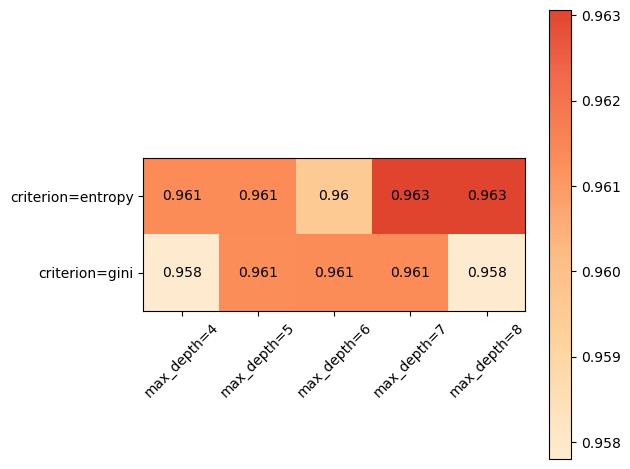

In [103]:
plot.grid_search(rf_d1_clf.cv_results_, change=('criterion', 'max_depth'), subset= {'max_features':'log2', 'n_estimators':200})

<AxesSubplot:>

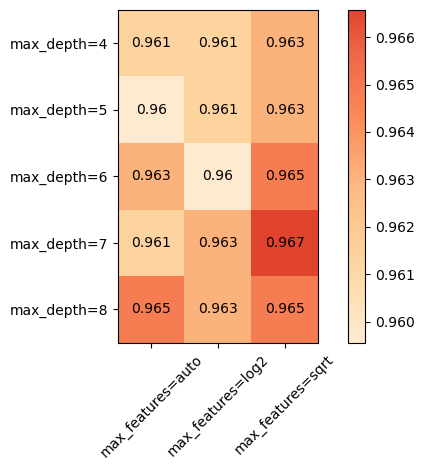

In [104]:
plot.grid_search(rf_d1_clf.cv_results_, change=('max_depth', 'max_features'), subset= {'criterion':'entropy', 'n_estimators':200})

<AxesSubplot:>

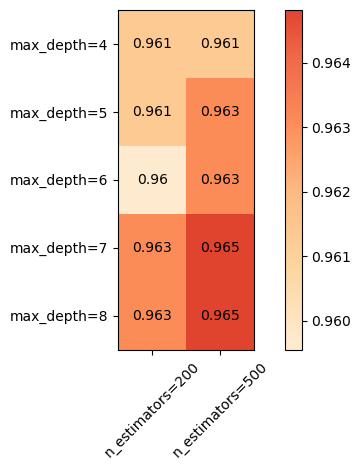

In [105]:
plot.grid_search(rf_d1_clf.cv_results_, change=('n_estimators', 'max_depth'), subset= {'criterion':'entropy', 'max_features':'log2'})

In [149]:
knn_d1_clf = tune_knn(X,Y)
knn_d1_clf.best_params_
# knn_d1_clf.cv_results_

{'n_neighbors': 11}

In [ ]:
plt.figure(figsize=(12,12))
ax = plot.grid_search(knn_d1_clf.cv_results_, change='n_neighbors',kind='bar')
# ax.set_xticklabels(ax.get_xticks(), rotation = 45)

In [163]:
dt_d1_clf = tune_decision_tree(X,Y)
dt_d1_clf.best_params_

{'max_leaf_nodes': 11, 'min_samples_split': 4}

In [ ]:
plt.figure(figsize=(20,20))
plot.grid_search(dt_d1_clf.cv_results_, change=('min_samples_split', 'max_leaf_nodes'))

#### Dataset 2 Hyperparameter Tuning

In [181]:
svm_d2_clf = tune_svm(X2,Y2)
svm_d2_clf.best_params_

{'C': 0.1, 'kernel': 'linear'}

<AxesSubplot:title={'center':'Grid search results'}, xlabel='C', ylabel='Mean score'>

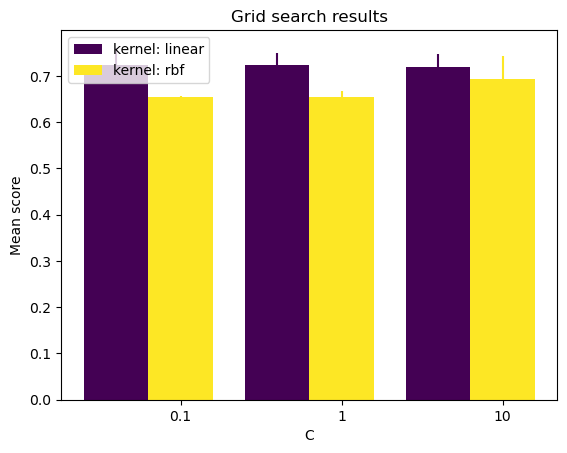

In [111]:
plot.grid_search(svm_d2_clf.cv_results_, change='C', kind='bar')

<AxesSubplot:title={'center':'Grid search results'}, xlabel='kernel', ylabel='Mean score'>

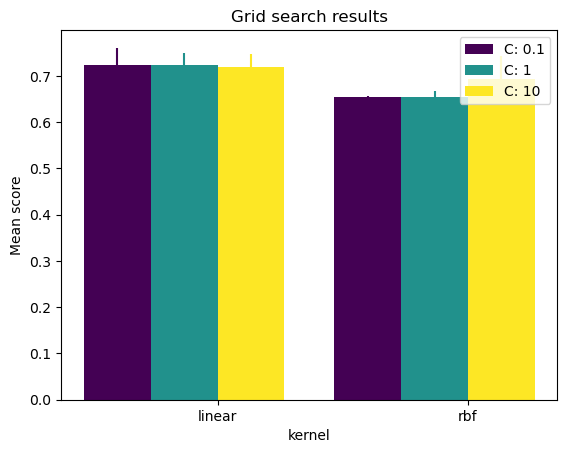

In [112]:
plot.grid_search(svm_d2_clf.cv_results_, change='kernel', kind='bar')

<AxesSubplot: >

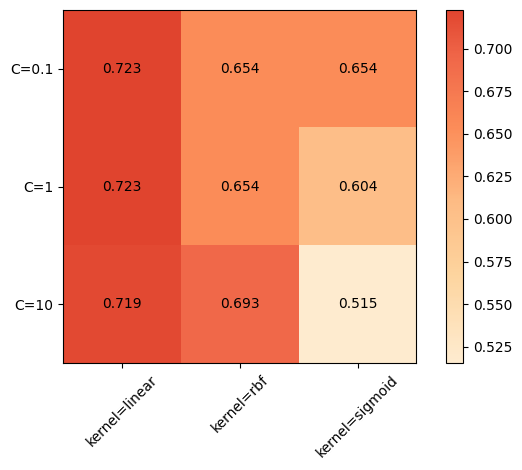

In [182]:
plot.grid_search(svm_d2_clf.cv_results_, change=('C', 'kernel'))

In [114]:
adaboost_d2_clf = tune_adaboost(X2,Y2)
adaboost_d2_clf.best_params_

{'n_estimators': 100}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:title={'center':'Grid search results'}, xlabel='n_estimators', ylabel='Mean score'>

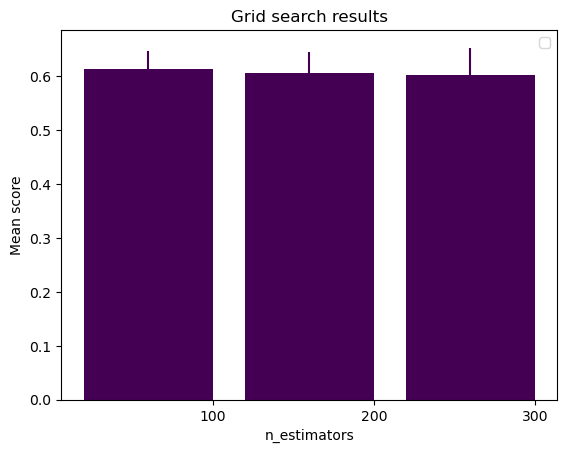

In [115]:
plot.grid_search(adaboost_d2_clf.cv_results_, change='n_estimators', kind='bar')

In [116]:
adaboost_d2_clf.cv_results_

{'mean_fit_time': array([0.07718277, 0.15308628, 0.22940359]),
 'std_fit_time': array([0.00168861, 0.00127198, 0.00264111]),
 'mean_score_time': array([0.00735798, 0.01355658, 0.01991692]),
 'std_score_time': array([0.00041844, 0.00011287, 0.00014246]),
 'param_n_estimators': masked_array(data=[100, 200, 300],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 100},
  {'n_estimators': 200},
  {'n_estimators': 300}],
 'split0_test_score': array([0.60215054, 0.60215054, 0.55913978]),
 'split1_test_score': array([0.65591398, 0.66666667, 0.67741935]),
 'split2_test_score': array([0.55434783, 0.54347826, 0.5326087 ]),
 'split3_test_score': array([0.63043478, 0.59782609, 0.60869565]),
 'split4_test_score': array([0.61956522, 0.61956522, 0.63043478]),
 'mean_test_score': array([0.61248247, 0.60593735, 0.60165965]),
 'std_test_score': array([0.03389729, 0.03963594, 0.05136734]),
 'rank_test_score': array([1, 2, 3], dtype=i

In [126]:
warnings.filterwarnings('ignore')
lr_d2_clf = tune_logistic_regression(X2,Y2, max_iter=1000)
print(lr_d2_clf.best_params_)
warnings.filterwarnings('always')

{'C': 0.1}


In [127]:
lr_d2_clf

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [1e-05, 0.001, 0.1, 5, 100000]},
             scoring='accuracy')

In [ ]:
ax = plot.grid_search(lr_d2_clf.cv_results_, change='C', kind='bar')
# ax.set_xticklabels(ax.get_xticks(), rotation = 45)

In [180]:
rf_d2_clf = tune_random_forest(X2,Y2)
rf_d2_clf.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'log2',
 'n_estimators': 200}

In [122]:
rf_d2_clf

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             scoring='accuracy')

<AxesSubplot:>

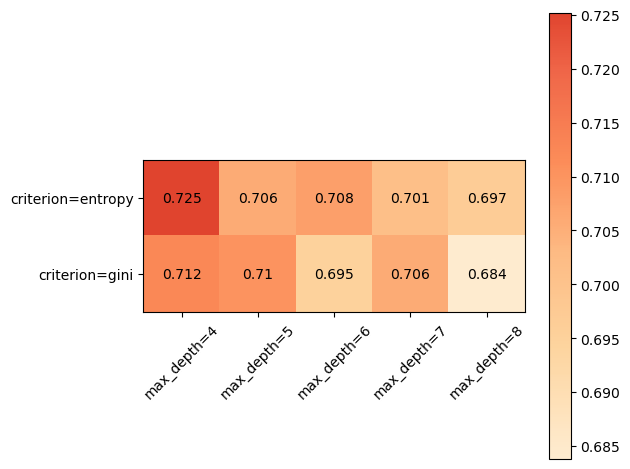

In [123]:
plot.grid_search(rf_d2_clf.cv_results_, change=('criterion', 'max_depth'), subset= {'max_features':'log2', 'n_estimators':200})

<AxesSubplot:>

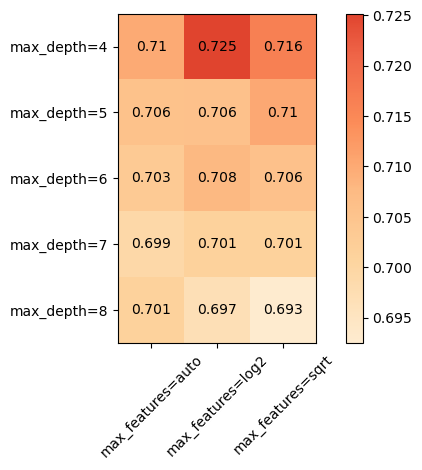

In [124]:
plot.grid_search(rf_d2_clf.cv_results_, change=('max_depth', 'max_features'), subset= {'criterion':'entropy', 'n_estimators':200})

<AxesSubplot:>

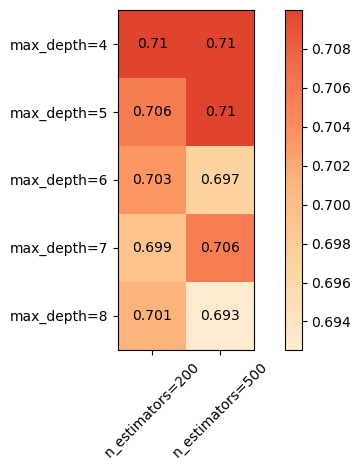

In [125]:
plot.grid_search(rf_d2_clf.cv_results_, change=('n_estimators', 'max_depth'), subset= {'criterion':'entropy', 'max_features':'auto'})

In [139]:
knn_d2_clf = tune_knn(X2,Y2)
knn_d2_clf.best_params_

{'n_neighbors': 25}

In [ ]:
plt.figure(figsize=(12,12))
ax = plot.grid_search(knn_d2_clf.cv_results_, change='n_neighbors',kind='bar')
# ax.set_xticklabels(ax.get_xticks(), rotation = 45)

In [165]:
dt_d2_clf = tune_decision_tree(X2,Y2)
dt_d2_clf.best_params_

{'max_leaf_nodes': 6, 'min_samples_split': 2}

In [ ]:
plt.figure(figsize=(20,20))
plot.grid_search(dt_d2_clf.cv_results_, change=('min_samples_split', 'max_leaf_nodes'))

#### Model Definitions

In [170]:
def svm(X,Y,C, kernel):
    clf = SVC(C=C, kernel=kernel)
    cv_results = cross_validate(clf, X,Y.values.ravel(), cv=10, scoring=('accuracy', 'precision', 'recall', 'f1','roc_auc'), return_train_score=True)
    return cv_results

In [88]:
def adaboost(X,Y, n_estimators):
    clf = AdaBoostClassifier(n_estimators=n_estimators, random_state=0)
    clf = clf.fit(X, Y.values.ravel())
    cv_results = cross_validate(clf, X,Y.values.ravel(), cv=10, scoring=('accuracy', 'precision', 'recall', 'f1','roc_auc'), return_train_score=True)
    return cv_results

In [89]:
def logistic_regression(X,y,reg_param, max_iter=100):
    # all parameters not specified are set to their defaults
    if(reg_param > 0):
        logisticRegr = LogisticRegression(penalty="l2",C=reg_param, max_iter=max_iter)
    else:
        logisticRegr = LogisticRegression(penalty="none", max_iter=max_iter) # default l2 reg param 
        
    scaler = preprocessing.StandardScaler().fit(X)
    x_scaled = scaler.transform(X)
    cv_results = cross_validate(logisticRegr, x_scaled,y.values.ravel(), cv=10, scoring=('accuracy', 'precision', 'recall', 'f1','roc_auc'), return_train_score=True)
    return cv_results

In [90]:
# TODO: Can I use the sklearn implementation? Or should I use the decision tree classifier to create custom random forest methodß
def random_forest(X,y, criterion, max_depth, max_features, n_estimators):
    clf = RandomForestClassifier(max_depth=max_depth, random_state=0, criterion=criterion,
                                 max_features=max_features,n_estimators=n_estimators )
    cv_results = cross_validate(clf, X,y.values.ravel(), cv=10, scoring=('accuracy', 'precision', 'recall', 'f1','roc_auc'), return_train_score=True)
    return cv_results

In [132]:
def knn(X,y,k):
    
    scaler = preprocessing.StandardScaler().fit(X)
    x_scaled = scaler.transform(X)
    #x_scaled_test = scaler.transform(x_test)
    
    knn = KNeighborsClassifier(n_neighbors=k)
    
    cv_results = cross_validate(knn, x_scaled,y.values.ravel(), cv=10, scoring=('accuracy', 'precision', 'recall', 'f1','roc_auc'), return_train_score=True)
    return cv_results

In [159]:
def decision_tree(X,y, max_leaf_nodes, min_samples_split):
    if(max_leaf_nodes == 0 and min_samples_split == 0 ):
        clf = tree.DecisionTreeClassifier(max_leaf_nodes=13, min_samples_split=3)
    else:
        clf = tree.DecisionTreeClassifier(max_leaf_nodes=13, min_samples_split=3)
    cv_results = cross_validate(clf, X,y, cv=10, scoring=('accuracy', 'precision', 'recall', 'f1','roc_auc'), return_train_score=True)
    return cv_results

#### DataSet 1 Training and Evaluation

In [ ]:
warnings.filterwarnings('ignore')
lr_d1 = logistic_regression(X,Y,0,1000) #before tuning
lr_d1

In [150]:
knn_d1 = knn(X,Y,1) # 1 neighbor would give perfect accuracy for training set, overfitting
knn_d1

{'fit_time': array([0.        , 0.        , 0.        , 0.00049973, 0.00049996,
        0.        , 0.0005002 , 0.        , 0.        , 0.        ]),
 'score_time': array([0.02050233, 0.01500201, 0.01599932, 0.014503  , 0.01550221,
        0.01599979, 0.01599884, 0.01600051, 0.01650047, 0.01699972]),
 'test_accuracy': array([0.96491228, 0.94736842, 0.98245614, 0.92982456, 0.92982456,
        0.94736842, 0.9122807 , 0.96491228, 0.94736842, 0.94642857]),
 'train_accuracy': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'test_precision': array([0.95454545, 0.91304348, 0.95454545, 0.94736842, 0.9047619 ,
        0.95      , 1.        , 1.        , 0.95      , 0.875     ]),
 'train_precision': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'test_recall': array([0.95454545, 0.95454545, 1.        , 0.85714286, 0.9047619 ,
        0.9047619 , 0.76190476, 0.9047619 , 0.9047619 , 1.        ]),
 'train_recall': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'test_f1': array([0.95454545, 

In [167]:
dt_d1 = decision_tree(X,Y, max_leaf_nodes=50, min_samples_split=4) #before tuning
# dt_d1 = decision_tree(X,Y, max_leaf_nodes=13, min_samples_split=3)
dt_d1

{'fit_time': array([0.00499678, 0.00499678, 0.00344801, 0.00454068, 0.00450182,
        0.00349951, 0.00400019, 0.00399923, 0.00450087, 0.00349998]),
 'score_time': array([0.00500154, 0.00250435, 0.00250244, 0.00245619, 0.00249982,
        0.00300145, 0.00249958, 0.00250006, 0.00250125, 0.00250173]),
 'test_accuracy': array([0.94736842, 0.87719298, 0.96491228, 0.89473684, 0.92982456,
        0.89473684, 0.92982456, 0.94736842, 0.96491228, 0.94642857]),
 'train_accuracy': array([0.98828125, 0.98828125, 0.9921875 , 0.9921875 , 0.99023438,
        0.99414062, 0.9921875 , 0.99023438, 0.98828125, 0.99415205]),
 'test_precision': array([0.95238095, 0.82608696, 1.        , 0.94117647, 0.94736842,
        0.82608696, 0.94736842, 0.95      , 1.        , 0.90909091]),
 'train_precision': array([0.9893617 , 0.99462366, 1.        , 0.99470899, 1.        ,
        1.        , 0.99470899, 0.98947368, 0.98941799, 1.        ]),
 'test_recall': array([0.90909091, 0.86363636, 0.9047619 , 0.76190476, 0.8

In [171]:
svm_d1 = svm(X,Y,1, 'linear')
svm_d1

{'fit_time': array([0.74949932, 1.22650003, 0.40700006, 0.44899988, 0.41000152,
        1.08349705, 0.35500145, 0.32049966, 0.59749913, 0.35499787]),
 'score_time': array([0.01200008, 0.00249958, 0.00249982, 0.00300026, 0.00250316,
        0.00250006, 0.00250006, 0.00250149, 0.00249982, 0.00250149]),
 'test_accuracy': array([0.9122807 , 0.96491228, 0.98245614, 0.9122807 , 0.9122807 ,
        0.96491228, 0.9122807 , 0.98245614, 1.        , 0.98214286]),
 'train_accuracy': array([0.96679688, 0.96289062, 0.97265625, 0.96875   , 0.97070312,
        0.96679688, 0.96875   , 0.96679688, 0.9609375 , 0.96491228]),
 'test_precision': array([0.84, 1.  , 1.  , 0.9 , 0.9 , 1.  , 0.9 , 1.  , 1.  , 1.  ]),
 'train_precision': array([0.96756757, 0.96721311, 0.97326203, 0.96296296, 0.97826087,
        0.95789474, 0.96791444, 0.96276596, 0.96216216, 0.96756757]),
 'test_recall': array([0.95454545, 0.90909091, 0.95238095, 0.85714286, 0.85714286,
        0.9047619 , 0.85714286, 0.95238095, 1.        , 0.9

In [169]:
#adaboost(x_train,x_test,y_train,y_test)
adaboost_d1 = adaboost(X,Y, 300)
adaboost_d1

{'fit_time': array([0.50644898, 0.51507092, 0.50337791, 0.50705314, 0.50841594,
        0.5051682 , 0.50730491, 0.51092482, 0.50558782, 0.50619173]),
 'score_time': array([0.0413599 , 0.03954196, 0.03951311, 0.03962088, 0.04014587,
        0.0395999 , 0.04025292, 0.03967714, 0.03957605, 0.03947806]),
 'test_accuracy': array([0.96491228, 0.98245614, 0.98245614, 0.92982456, 0.96491228,
        0.96491228, 0.98245614, 0.96491228, 0.98245614, 0.96428571]),
 'train_accuracy': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'test_precision': array([0.95454545, 1.        , 1.        , 0.94736842, 1.        ,
        0.95238095, 1.        , 1.        , 1.        , 0.91304348]),
 'train_precision': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'test_recall': array([0.95454545, 0.95454545, 0.95238095, 0.85714286, 0.9047619 ,
        0.95238095, 0.95238095, 0.9047619 , 0.95238095, 1.        ]),
 'train_recall': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'test_f1': array([0.95454545, 

In [170]:
#random_forest(x_train,x_test,y_train,y_test)
rf_d1 = random_forest(X,Y, 'gini', 5, 'sqrt', 500)
rf_d1

{'fit_time': array([0.5601418 , 0.54518795, 0.5330739 , 0.52892184, 0.59085989,
        0.53139091, 0.52966189, 0.5264194 , 0.53363705, 0.539639  ]),
 'score_time': array([0.04757929, 0.04682302, 0.04470491, 0.04611516, 0.04500031,
        0.04498577, 0.04442811, 0.04453874, 0.04471588, 0.04688478]),
 'test_accuracy': array([0.96491228, 0.96491228, 0.98245614, 0.92982456, 0.96491228,
        0.96491228, 0.96491228, 0.98245614, 0.98245614, 0.94642857]),
 'train_accuracy': array([0.99414062, 0.99023438, 0.99414062, 0.99414062, 0.99414062,
        0.99414062, 0.99609375, 0.99609375, 0.99414062, 0.99415205]),
 'test_precision': array([0.95454545, 0.95454545, 1.        , 0.94736842, 1.        ,
        0.95238095, 1.        , 1.        , 1.        , 0.90909091]),
 'train_precision': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'test_recall': array([0.95454545, 0.95454545, 0.95238095, 0.85714286, 0.9047619 ,
        0.95238095, 0.9047619 , 0.95238095, 0.95238095, 0.95238095]),
 'train_r

#### DataSet 2 Training and Evaluation

In [130]:
warnings.filterwarnings('ignore')
lr_d2 = logistic_regression(X2,Y2,0,1000) #before tuning
# lr_d2 = logistic_regression(X2,Y2,0.0599,1000) #before tuning
lr_d2

{'fit_time': array([0.00099945, 0.00150084, 0.00099969, 0.00099993, 0.00100183,
        0.00150013, 0.00099945, 0.00099921, 0.00099969, 0.00099683]),
 'score_time': array([0.00099993, 0.00150084, 0.00149941, 0.0010016 , 0.00099945,
        0.00150061, 0.00099993, 0.00100017, 0.00150013, 0.00100017]),
 'test_accuracy': array([0.74468085, 0.70212766, 0.7173913 , 0.73913043, 0.63043478,
        0.7173913 , 0.7826087 , 0.73913043, 0.67391304, 0.7173913 ]),
 'train_accuracy': array([0.73493976, 0.7373494 , 0.73798077, 0.73798077, 0.74038462,
        0.75240385, 0.72836538, 0.74038462, 0.73798077, 0.73798077]),
 'test_precision': array([0.6       , 0.58333333, 0.58823529, 0.625     , 0.45454545,
        0.66666667, 0.8       , 0.64285714, 0.54545455, 0.61538462]),
 'train_precision': array([0.6440678 , 0.6446281 , 0.64957265, 0.65486726, 0.65789474,
        0.67521368, 0.6302521 , 0.65517241, 0.64227642, 0.64957265]),
 'test_recall': array([0.75  , 0.4375, 0.625 , 0.625 , 0.3125, 0.375 , 0.5

In [151]:
knn_d2 = knn(X2,Y2,1) # 1 neighbor would give perfect accuracy for training set, overfitting
knn_d2

{'fit_time': array([0.00051594, 0.00049996, 0.00050092, 0.00050282, 0.        ,
        0.        , 0.00050211, 0.00049973, 0.00049996, 0.        ]),
 'score_time': array([0.00198126, 0.0025003 , 0.00250077, 0.00249505, 0.00199986,
        0.00250006, 0.00199819, 0.00199986, 0.00199986, 0.00199986]),
 'test_accuracy': array([0.61702128, 0.70212766, 0.69565217, 0.7173913 , 0.63043478,
        0.60869565, 0.69565217, 0.69565217, 0.60869565, 0.63043478]),
 'train_accuracy': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'test_precision': array([0.45454545, 0.54545455, 0.625     , 0.61538462, 0.45454545,
        0.4375    , 1.        , 0.57142857, 0.41666667, 0.47058824]),
 'train_precision': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'test_recall': array([0.625 , 0.75  , 0.3125, 0.5   , 0.3125, 0.4375, 0.125 , 0.5   ,
        0.3125, 0.5   ]),
 'train_recall': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'test_f1': array([0.52631579, 0.63157895, 0.41666667, 0.55172414, 0.37

In [168]:
dt_d2 = decision_tree(X2,Y2, max_leaf_nodes=50, min_samples_split=0) #before tuning
# dt_d2 = decision_tree(X2,Y2, max_leaf_nodes=6, min_samples_split=2)
dt_d2

{'fit_time': array([0.002002  , 0.00199938, 0.00199866, 0.00200009, 0.00200009,
        0.00150013, 0.00149941, 0.00150013, 0.00200057, 0.00149965]),
 'score_time': array([0.00349879, 0.00300097, 0.00349998, 0.00250006, 0.00249982,
        0.00299978, 0.00250006, 0.0025022 , 0.00299811, 0.00300002]),
 'test_accuracy': array([0.68085106, 0.72340426, 0.7173913 , 0.67391304, 0.63043478,
        0.69565217, 0.73913043, 0.73913043, 0.67391304, 0.69565217]),
 'train_accuracy': array([0.81204819, 0.79759036, 0.80288462, 0.79807692, 0.81009615,
        0.81971154, 0.80528846, 0.80288462, 0.80048077, 0.79326923]),
 'test_precision': array([0.52631579, 0.57894737, 0.6       , 0.53846154, 0.47058824,
        0.66666667, 0.7       , 0.64285714, 0.53846154, 0.57142857]),
 'train_precision': array([0.78448276, 0.69736842, 0.76271186, 0.80612245, 0.73049645,
        0.83495146, 0.75609756, 0.73484848, 0.74796748, 0.75438596]),
 'test_recall': array([0.625 , 0.6875, 0.5625, 0.4375, 0.5   , 0.25  , 0.4

In [172]:
svm_d2 = svm(X2,Y2,1, 'linear')
svm_d2

{'fit_time': array([0.10126424, 0.12200022, 0.1289978 , 0.08750033, 0.11000109,
        0.079     , 0.08199763, 0.09099936, 0.12199974, 0.11600018]),
 'score_time': array([0.00300002, 0.00250006, 0.00250006, 0.00349998, 0.0024991 ,
        0.00250006, 0.00300026, 0.00250053, 0.00300026, 0.00299978]),
 'test_accuracy': array([0.72340426, 0.74468085, 0.73913043, 0.76086957, 0.65217391,
        0.7173913 , 0.76086957, 0.73913043, 0.67391304, 0.73913043]),
 'train_accuracy': array([0.7373494 , 0.7373494 , 0.71634615, 0.74038462, 0.73076923,
        0.73557692, 0.73076923, 0.73317308, 0.74519231, 0.73557692]),
 'test_precision': array([0.57894737, 0.64285714, 0.61111111, 0.66666667, 0.5       ,
        0.71428571, 0.72727273, 0.64285714, 0.54545455, 0.66666667]),
 'train_precision': array([0.65217391, 0.64      , 0.60655738, 0.66071429, 0.63333333,
        0.6440678 , 0.63559322, 0.63636364, 0.64179104, 0.63492063]),
 'test_recall': array([0.6875, 0.5625, 0.6875, 0.625 , 0.375 , 0.3125, 0.5

In [174]:
#adaboost(x_train,x_test,y_train,y_test)
adaboost_d2 = adaboost(X2,Y2, 100)
adaboost_d2

{'fit_time': array([0.08132792, 0.08146906, 0.07866287, 0.07741117, 0.07742596,
        0.07731295, 0.07722425, 0.07961202, 0.07824016, 0.07740331]),
 'score_time': array([0.0169661 , 0.01594496, 0.01524138, 0.01468205, 0.01546693,
        0.01470399, 0.01462102, 0.01509714, 0.01505184, 0.01475286]),
 'test_accuracy': array([0.59574468, 0.63829787, 0.65217391, 0.63043478, 0.52173913,
        0.67391304, 0.69565217, 0.65217391, 0.69565217, 0.67391304]),
 'train_accuracy': array([0.85060241, 0.86506024, 0.85336538, 0.87740385, 0.86298077,
        0.87740385, 0.85336538, 0.84615385, 0.87259615, 0.86538462]),
 'test_precision': array([0.4       , 0.47619048, 0.5       , 0.47368421, 0.28571429,
        0.55555556, 0.58333333, 0.5       , 0.58333333, 0.57142857]),
 'train_precision': array([0.80597015, 0.86065574, 0.82170543, 0.88429752, 0.84251969,
        0.83941606, 0.81203008, 0.78985507, 0.85826772, 0.83846154]),
 'test_recall': array([0.375 , 0.625 , 0.4375, 0.5625, 0.25  , 0.3125, 0.4

In [175]:
#random_forest(x_train,x_test,y_train,y_test)
rf_d2 = random_forest(X2,Y2, 'entropy', 4, 'auto', 200)
rf_d2

{'fit_time': array([0.18778968, 0.16347003, 0.16333795, 0.1634469 , 0.16430783,
        0.16326594, 0.165416  , 0.16367984, 0.16530991, 0.16236806]),
 'score_time': array([0.02052927, 0.01969576, 0.01949072, 0.01968622, 0.01973677,
        0.019768  , 0.02006197, 0.02018905, 0.01995897, 0.01968098]),
 'test_accuracy': array([0.74468085, 0.68085106, 0.76086957, 0.73913043, 0.67391304,
        0.69565217, 0.7173913 , 0.73913043, 0.7173913 , 0.7173913 ]),
 'train_accuracy': array([0.82168675, 0.81445783, 0.80528846, 0.82451923, 0.82211538,
        0.82692308, 0.8125    , 0.80769231, 0.82211538, 0.81730769]),
 'test_precision': array([0.61111111, 0.55555556, 0.72727273, 0.625     , 0.57142857,
        0.66666667, 0.66666667, 0.64285714, 0.71428571, 0.66666667]),
 'train_precision': array([0.84313725, 0.82524272, 0.82474227, 0.85858586, 0.85714286,
        0.84615385, 0.84375   , 0.81372549, 0.84313725, 0.84693878]),
 'test_recall': array([0.6875, 0.3125, 0.5   , 0.625 , 0.25  , 0.25  , 0.3

# Graphs

In [105]:
def get_average(lst):
    return sum(lst) / len(lst)
def create_graph(res_d1, res_d2):
    index = res_d1.keys()
    d1_vals = [get_average(res_d1[metric]) for metric in index]
    d2_vals = [get_average(res_d2[metric]) for metric in index]
    df = pd.DataFrame({'dataset_1': d1_vals,
                   'dataset_2': d2_vals}, index=index)
    #df.plot.bar()
    print(df)
    return df

                 dataset_1  dataset_2
fit_time          0.037833   0.001100
score_time        0.001401   0.001200
test_accuracy     0.957738   0.716420
train_accuracy    1.000000   0.738575
test_precision    0.940101   0.612148
train_precision   1.000000   0.650352
test_recall       0.947835   0.506250
train_recall      1.000000   0.530556
test_f1           0.943463   0.545965
train_f1          1.000000   0.584294
test_roc_auc      0.983185   0.774993
train_roc_auc     1.000000   0.795760


<AxesSubplot: >

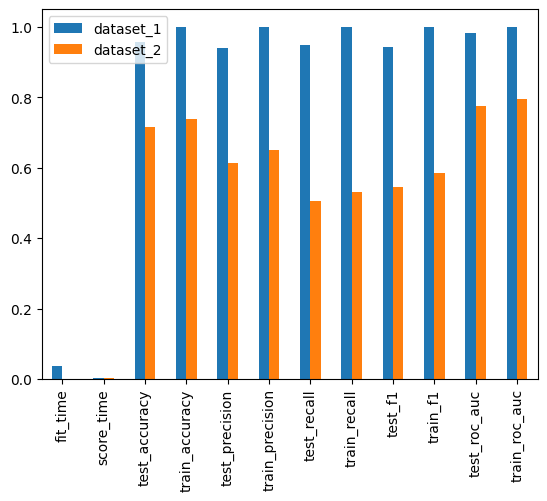

In [131]:
df = create_graph(lr_d1, lr_d2)
df.plot.bar()

                 dataset_1  dataset_2
fit_time          0.000150   0.000352
score_time        0.016301   0.002198
test_accuracy     0.947274   0.660176
train_accuracy    1.000000   1.000000
test_precision    0.944926   0.559111
train_precision   1.000000   1.000000
test_recall       0.914719   0.437500
train_recall      1.000000   1.000000
test_f1           0.927124   0.453170
train_f1          1.000000   1.000000
test_roc_auc      0.940455   0.608266
train_roc_auc     1.000000   1.000000


<AxesSubplot: >

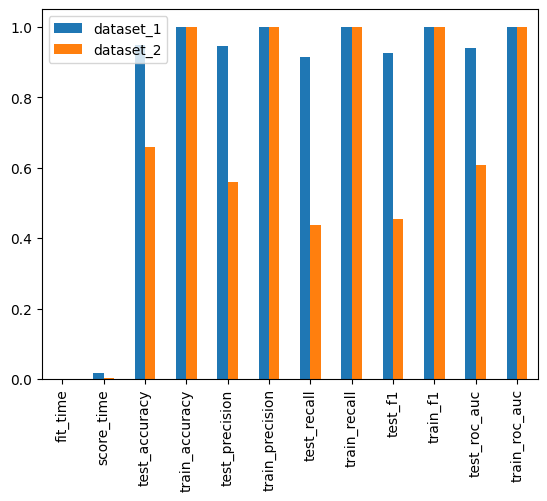

In [152]:
df = create_graph(knn_d1, knn_d2)
df.plot.bar()

                 dataset_1  dataset_2
fit_time          0.004198   0.001800
score_time        0.002797   0.002900
test_accuracy     0.929731   0.696947
train_accuracy    0.991017   0.804233
test_precision    0.929956   0.583373
train_precision   0.995230   0.760943
test_recall       0.882035   0.500000
train_recall      0.980603   0.640972
test_f1           0.903748   0.526644
train_f1          0.987853   0.693063
test_roc_auc      0.890592   0.665800
train_roc_auc     0.992958   0.839497


<AxesSubplot: >

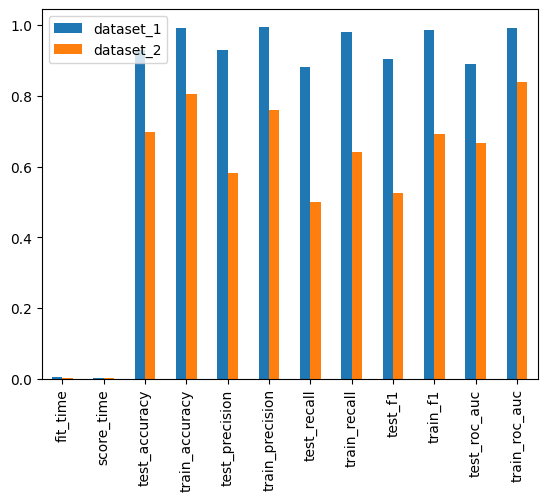

In [169]:
df = create_graph(dt_d1, dt_d2)
df.plot.bar()

<AxesSubplot:>

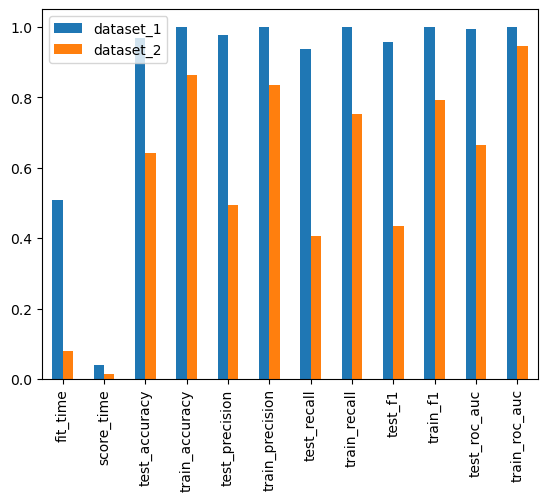

In [179]:
df = create_graph(adaboost_d1, adaboost_d2)
df.plot.bar()

                 dataset_1  dataset_2
fit_time          0.595350   0.103976
score_time        0.003501   0.002800
test_accuracy     0.952600   0.725069
train_accuracy    0.966999   0.734249
test_precision    0.954000   0.629612
train_precision   0.966757   0.638552
test_recall       0.919697   0.518750
train_recall      0.943913   0.536806
test_f1           0.935697   0.559261
train_f1          0.955172   0.582932
test_roc_auc      0.989301   0.771714
train_roc_auc     0.994858   0.792942


<AxesSubplot: >

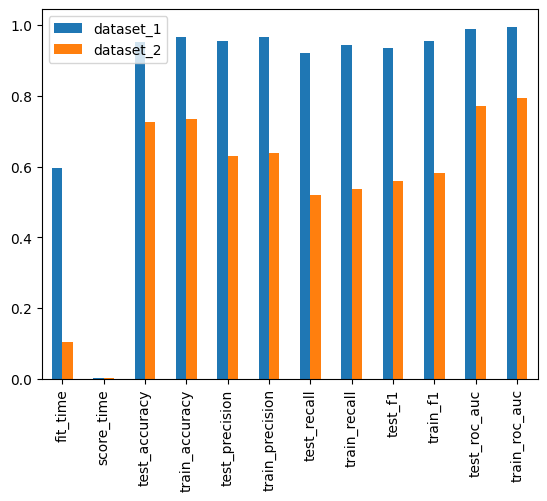

In [173]:
df = create_graph(svm_d1, svm_d2)
df.plot.bar()

<AxesSubplot:>

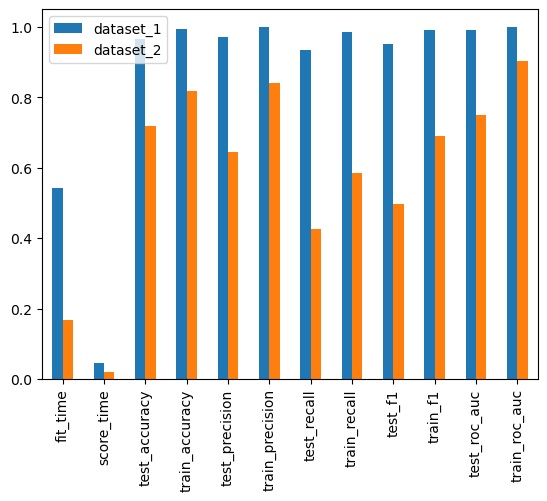

In [180]:
df = create_graph(rf_d1, rf_d2)
df.plot.bar()